___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples


In [1]:
# import the data and view the DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA



<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

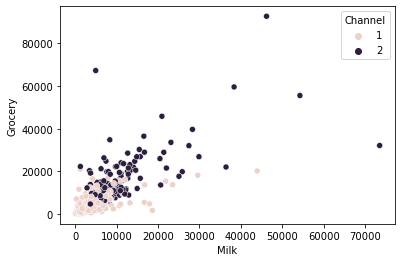

In [5]:
# scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

<AxesSubplot:xlabel='Milk', ylabel='Count'>

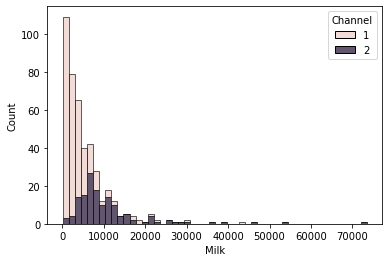

In [6]:
# histogram of MILK spending, colored by Channel
sns.histplot(data=df, x='Milk', hue='Channel', multiple="stack")

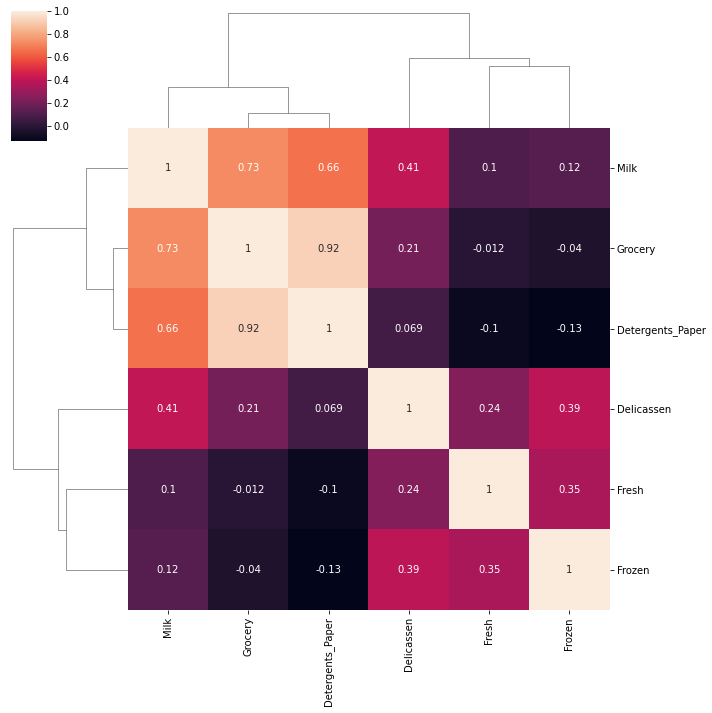

In [7]:
# clustermap of the correlations between spending on different cateogires.
sns.clustermap(df.drop(['Channel','Region'], axis=1).corr(), annot=True)

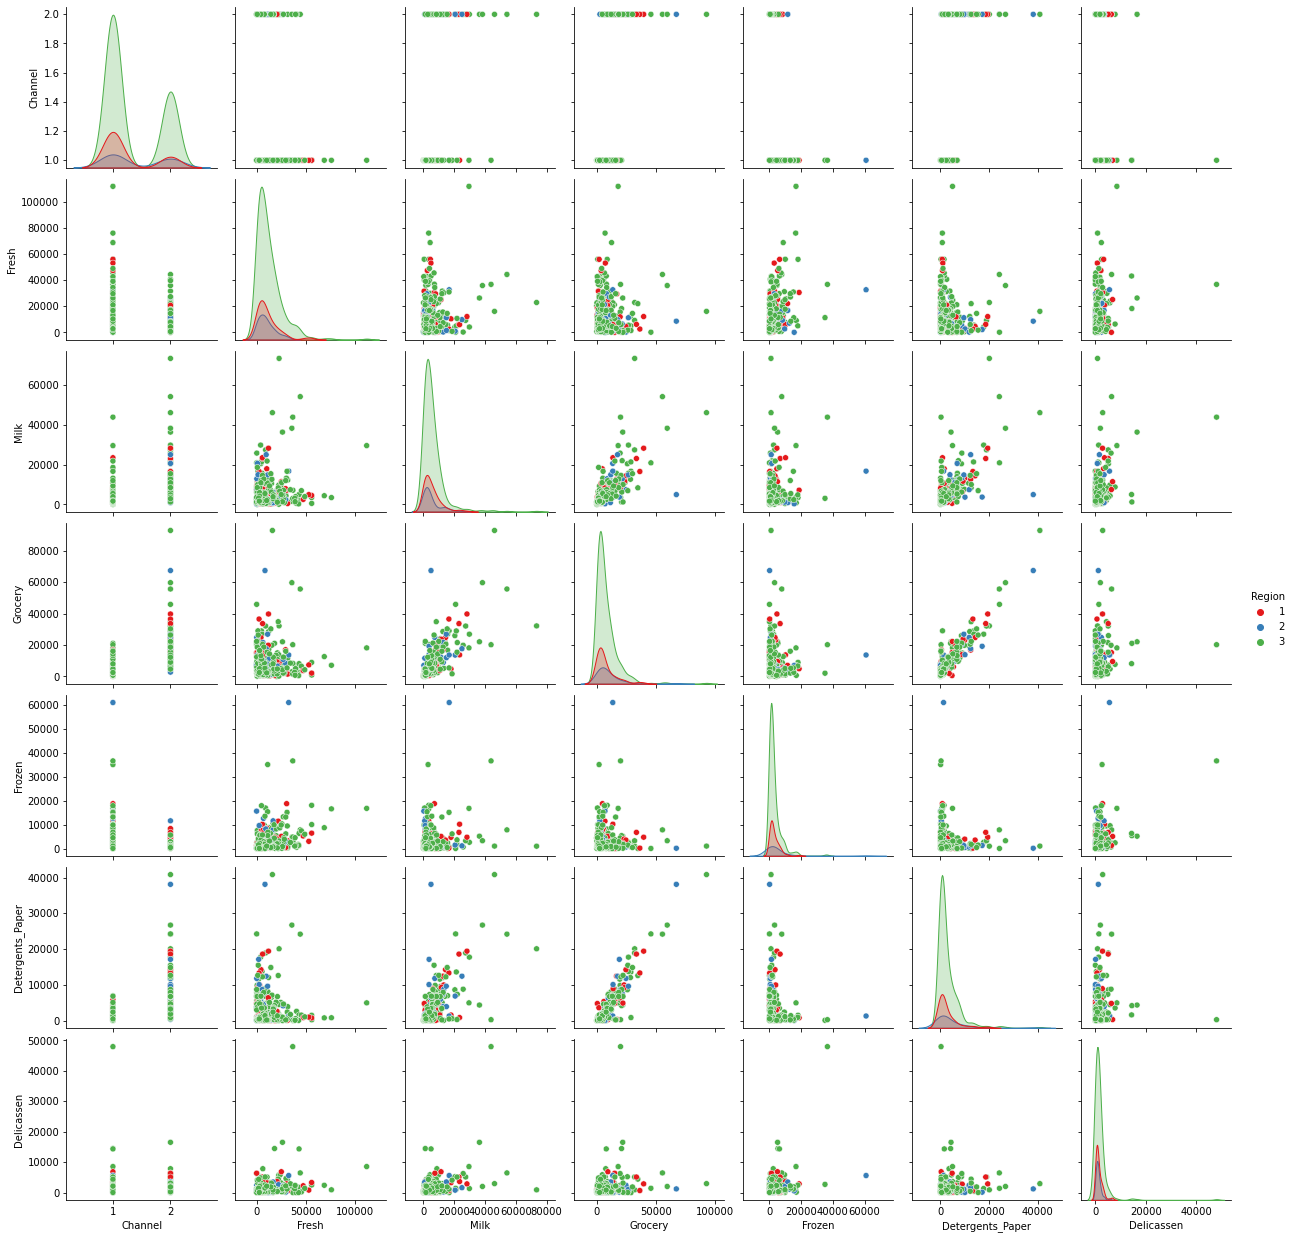

In [8]:
# PairPlot of the dataframe, colored by Region
sns.pairplot(df, hue='Region', palette='Set1')

## DBSCAN


In [9]:
# Since the values of the features are in different orders of magnitude, let's scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X = scaler.fit_transform(df)

In [12]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [13]:
# create a variety of models testing different epsilon values and keep track of them
eps_value = []

for eps in np.linspace(0.001, 3, 50):
    
    model = DBSCAN(eps=eps, min_samples=2*scaled_X.shape[1])
    model.fit(scaled_X)
    
    eps_value.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))

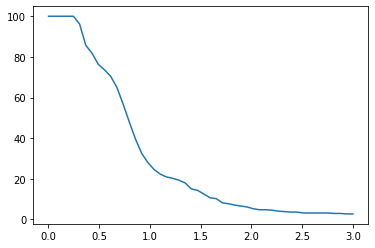

In [14]:
# line plot of the percentage of outlier points versus the epsilon value choice
sns.lineplot(x=np.linspace(0.001, 3, 50), y=eps_value);

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [15]:
model = DBSCAN(eps=2, min_samples=2*scaled_X.shape[1])
model.fit(scaled_X)

DBSCAN(eps=2, min_samples=16)

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

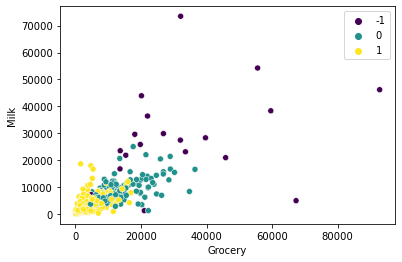

In [16]:
# scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=model.labels_, palette='viridis')

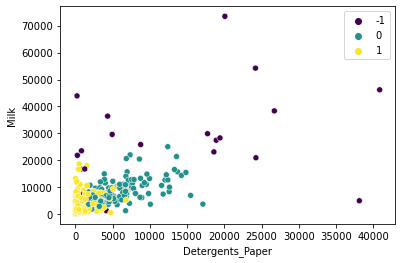

In [17]:
# scatterplot of Milk vs. Detergents Paper colored by the labels
sns.scatterplot(data=df, x='Detergents_Paper', y='Milk', hue=model.labels_, palette='viridis');

In [18]:
# Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.
df['Labels'] = model.labels_

In [19]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [20]:
pivot_df = df.drop(['Region','Channel'], axis=1).groupby('Labels').mean()

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaled_df = pd.DataFrame(scaler.fit_transform(pivot_df), index=pivot_df.index, columns=pivot_df.columns)

In [24]:
scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


<AxesSubplot:ylabel='Labels'>

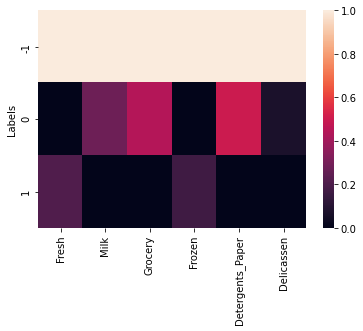

In [25]:
sns.heatmap(scaled_df)

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

<AxesSubplot:ylabel='Labels'>

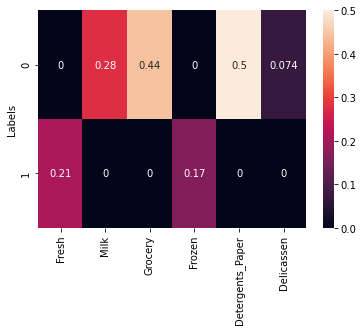

In [26]:
sns.heatmap(scaled_df[1:],annot=True)

**TASK: What spending category were the two clusters mode different in?**

In [27]:
#CODE HERE